# The Sparks Foundation internship
# Data Science and Business Analytics
# Name:Srideep Bhattacharya
# Exploratory Data Analysis-Retail

# As a business manager,try to find out the weak areas where you can work to bring more profit. What all business problems you can derive by exploring the data?

# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("SampleSuperstore.csv") #reading the dataset.

In [2]:
df.shape #finding dimensions of dataset.

(9994, 13)

In [3]:
df.head(10) #printing first 10 rows of dataset.

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
df.dtypes #checking the datatype of each attribute.

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [5]:
df.isnull().sum() #checking for null values if any.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.describe() #calculating certain quantities

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df['Category'].unique

<bound method Series.unique of 0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9989          Furniture
9990          Furniture
9991         Technology
9992    Office Supplies
9993    Office Supplies
Name: Category, Length: 9994, dtype: object>

# Data exploration to draw insights.

<AxesSubplot:>

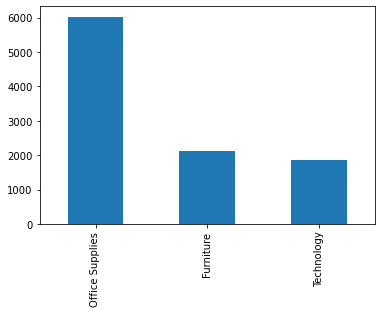

In [8]:
df['Category'].value_counts().plot.bar() #calculating count of each category purchase.Clearly,office supplies is in demand.

<AxesSubplot:>

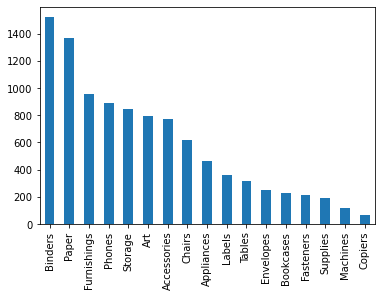

In [9]:
df['Sub-Category'].value_counts().plot.bar() #Binders is in demand,followed by paper.

In [10]:
df.columns #These are our attributes in dataset.Profit is the target attribute.

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
df['Country'].unique

<bound method Series.unique of 0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
9989    United States
9990    United States
9991    United States
9992    United States
9993    United States
Name: Country, Length: 9994, dtype: object>

In [12]:
df.corr() #Coorelation amongst various parameters.

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [13]:
df['Sales'].corr(df['Profit']) #Profit is fairly dependent on sales.

0.479064349737706

<AxesSubplot:xlabel='Category', ylabel='Profit'>

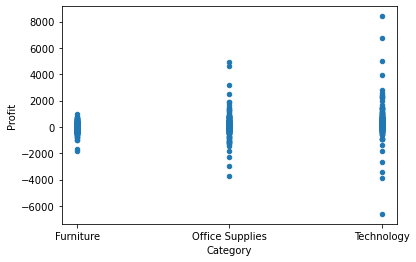

In [14]:
df.plot.scatter('Category','Profit') #At first look, technology seems to be in highest profit.

<AxesSubplot:xlabel='Category'>

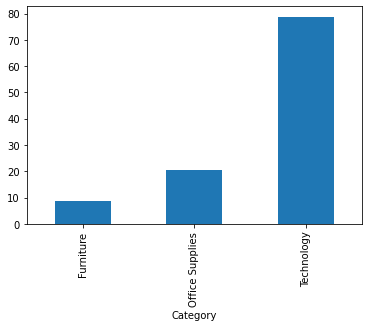

In [15]:
df.groupby('Category')['Profit'].mean().plot.bar() #Average profit of category technology is highest.

<AxesSubplot:xlabel='Sub-Category'>

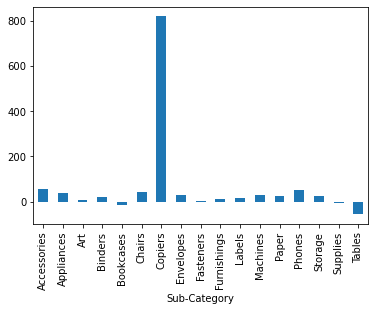

In [16]:
df.groupby('Sub-Category')['Profit'].mean().plot.bar() #average profit of copiers is really high.

<AxesSubplot:xlabel='Sub-Category'>

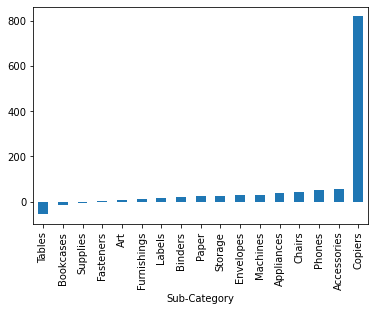

In [17]:
df.groupby('Sub-Category')['Profit'].mean().sort_values().plot.bar()

<AxesSubplot:xlabel='State'>

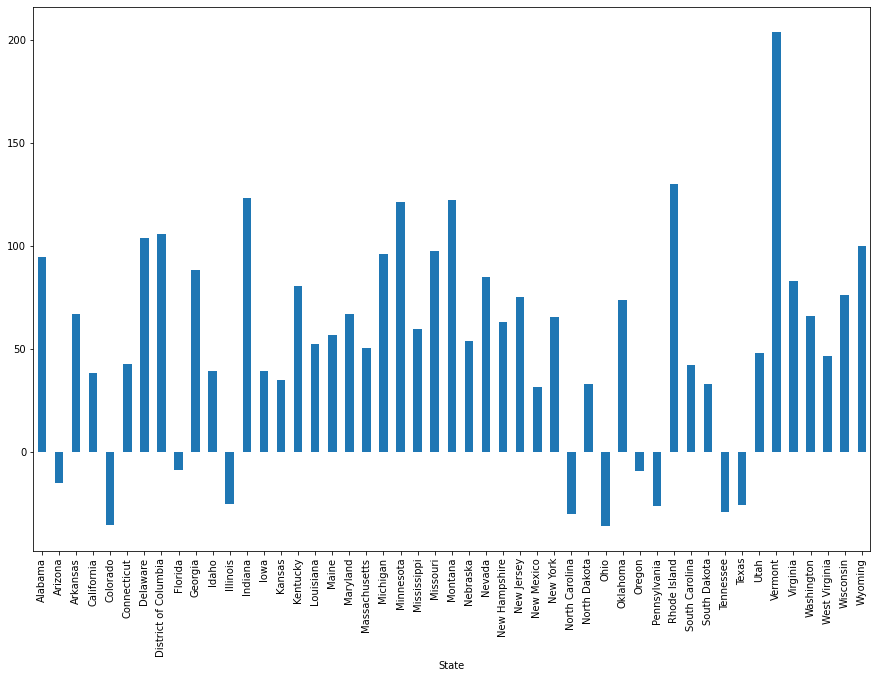

In [18]:
df.groupby('State')['Profit'].mean().plot.bar(figsize=(15,10))
#States like Arizona,Colorado,Florida,Illinois,North Carolina,Ohio,Oregon,Pennsylvania,Tennessee and Texas are facing loss on
#average.

<AxesSubplot:xlabel='Region'>

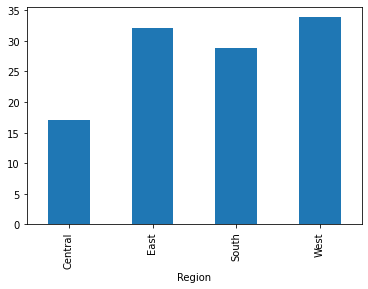

In [19]:
df.groupby("Region")["Profit"].mean().plot.bar() #West region is highest in average profit,whereas Central is lowest.

# Answer: After analysing the dataset,we derive the following business problems:
# We find that technology is earning highest profit.But,the company is selling office supplies the most. Technology stuffs are being least sold. Copiers is earning the highest profit,so company needs to focus more on selling copiers. States like Arizona,Colorado,Florida,Illinois,North Carolina,Ohio,Oregon,Pennsylvania,Tennessee and Texas are facing loss on average. Company needs to improvise more on these states. Central region is earning least profit followed by south,east,west respectively. Hence,these are the weaknesses where we could work to make more profit.